# **CO2 Emission by Vehicles Prediction**

## **1. Collecting Data**

The dataset used in this study was sourced from Kaggle at the following link: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data. From this dataset, we analyzed and built a prediction model to see the value of CO2 emissions from vehicles.

In [116]:
# Load library yang diperlukan
import pandas as pd

In [117]:
# Load data menjadi data frame
dataset = pd.read_csv('CO2 Emissions_Canada.csv')

In [118]:
# Display data
dataset

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [119]:
# Display an information of the dataset file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [120]:
# Display a description of the dataset file
dataset.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## **2. Data Cleaning**

In this activity, you must be able to check the data you use for missing values, noisy data, or other inappropriate data.

### **2.1. Checking for Missing Value**

In [121]:
dataset.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Based on the existing checks, **there are no missing values**.

### **2.2. Checking for Duplicate Value**

In [122]:
# Displaying duplicate data
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [123]:
#Get the number of duplicate records in the dataset
dataset.duplicated().sum()

1103

Based on the existing checks, **there are 1103 duplicate values**.

In [124]:
# Drop all duplicates data
dataset.drop_duplicates(inplace=True)

# Checking to confirm if the duplicates have been removed
dataset.duplicated().sum()

0

In [125]:
dataset.shape

(6282, 12)

## **3. Exploratory Data Analysis (EDA)**

### **3.1. Correlation Matrix**

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

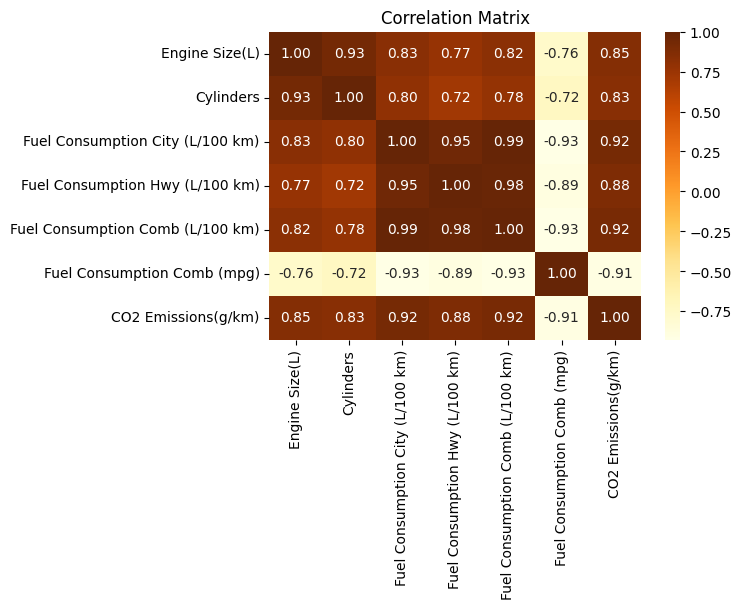

In [127]:
# Correlation Analysis using only numeric values
numeric_dataset = dataset.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_dataset.corr()  # Calculate correlation matrix

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [128]:
# Correlation Analysis using only numeric values
numeric_dataset = dataset.select_dtypes(include=[np.number])  # Select only numeric columns

# Checking the correlated variables
correlation = numeric_dataset.corr()['CO2 Emissions(g/km)'].abs().sort_values(ascending=False)
print(correlation)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.918756
Fuel Consumption Comb (L/100 km)    0.916840
Fuel Consumption Comb (mpg)         0.906783
Fuel Consumption Hwy (L/100 km)     0.883424
Engine Size(L)                      0.854802
Cylinders                           0.834687
Name: CO2 Emissions(g/km), dtype: float64


The existing values show that **the variable/attribute values are closely correlated with the target variable**.

### **3.2. Visualization**

In [129]:
# Assigning the correlated variables to numerical_vars for visuals
numerical_vars =['Engine Size(L)', 'Cylinders',
                               'Fuel Consumption City (L/100 km)',
                               'Fuel Consumption Hwy (L/100 km)',
                               'Fuel Consumption Comb (L/100 km)',
                               'CO2 Emissions(g/km)']

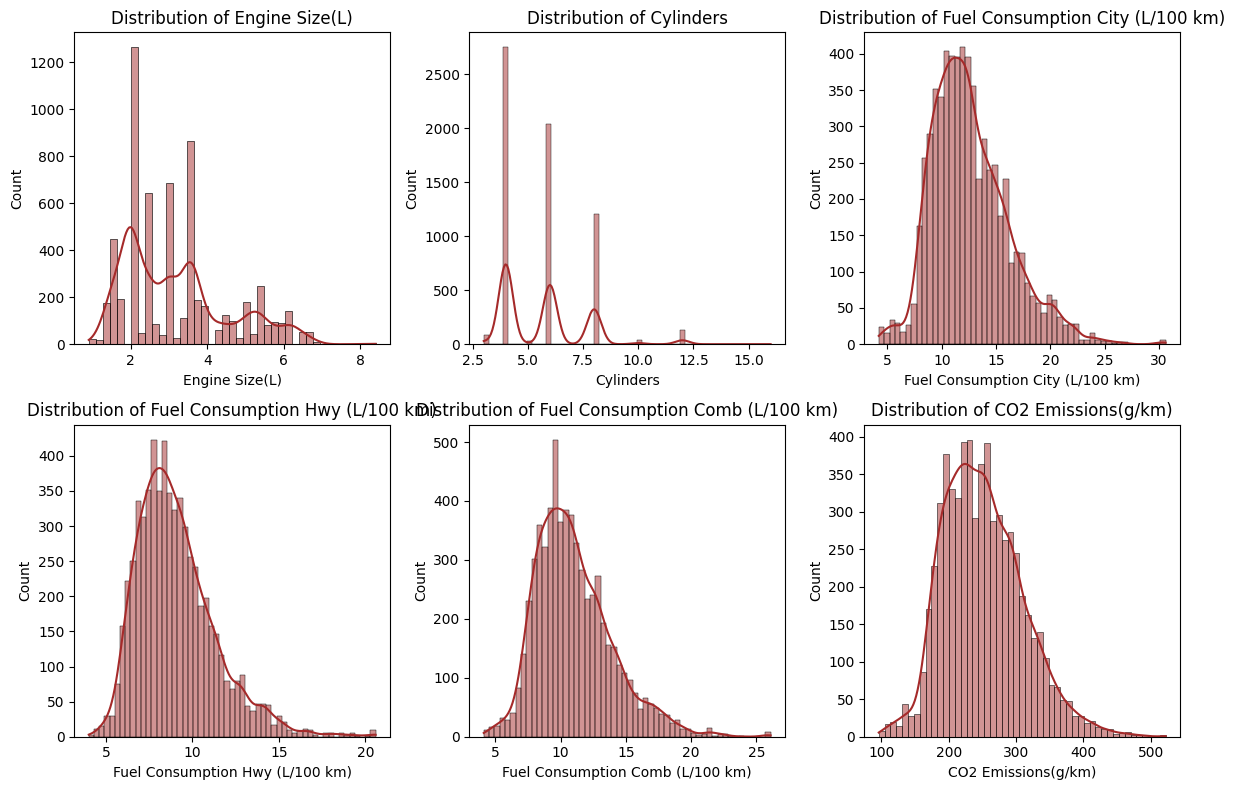

In [130]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=dataset, x=var, kde=True, color="Brown")
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

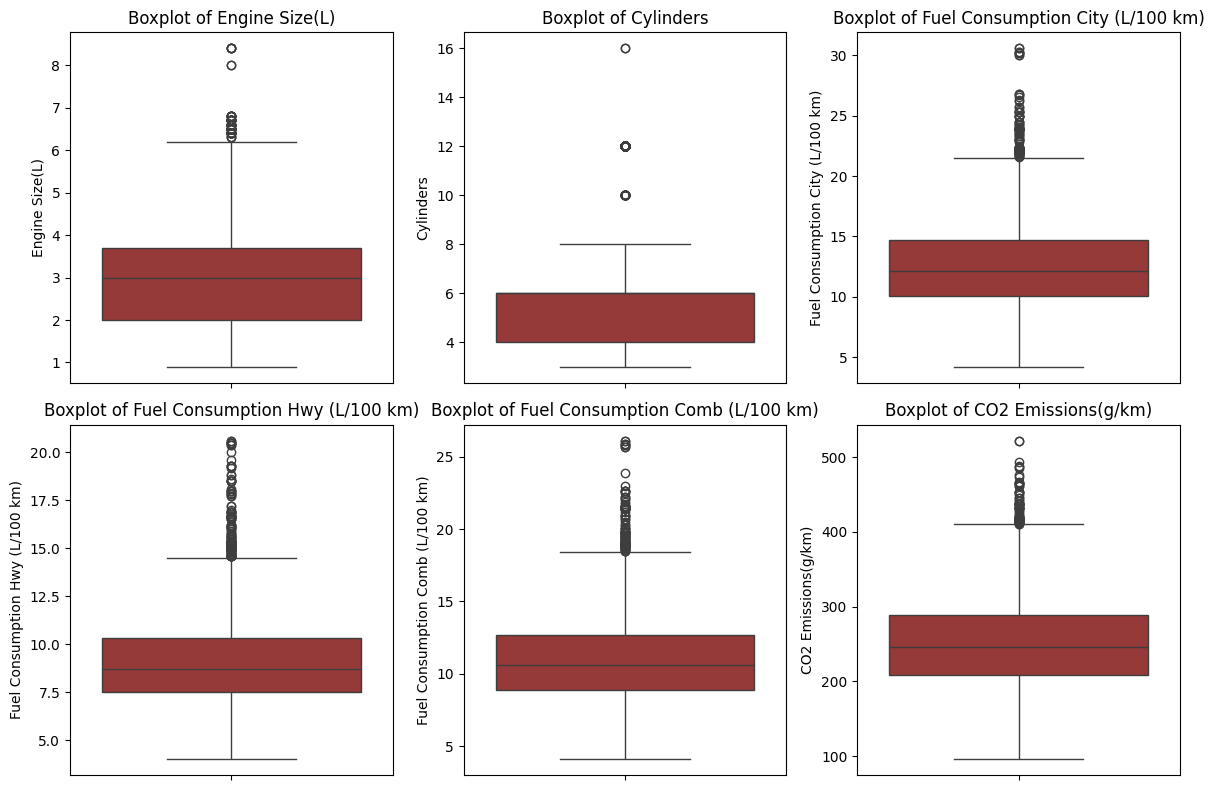

In [131]:
# Checking for outliers using boxplot
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset, y=var, color="Brown")
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

## **4. Feature Engineering**

### **4.1. Selection & Transformation**

In [132]:
# Separate numerical and categorical variables for easy analysis

cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


Numerical Variables:
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [133]:
# Store numeric variables in numc_names
numc_names=['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)', 'CO2_Emissions(g/km)']

In [134]:
# Checking the dataset
dataset

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### **4.2. One Hot Encoding**

In [135]:
# Changing the name
df = dataset.copy()

# Drop categorical varibales
df.drop(['Make','Model','Vehicle Class','Transmission'],inplace=True,axis=1)

# Checking the dataset
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [136]:
df.shape

(6282, 8)

In [137]:
# Drop rows where the Fuel_Type is 'N'
df = df[df["Fuel Type"] != "N"]

# Display the modified DataFrame
df

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,30,219
7381,2.0,4,Z,11.2,8.3,9.9,29,232
7382,2.0,4,Z,11.7,8.6,10.3,27,240
7383,2.0,4,Z,11.2,8.3,9.9,29,232


In [138]:
# One-hot encoding on the 'Fuel_Type' column with drop_first=True
dums = pd.get_dummies(df['Fuel Type'], prefix="Fuel Type", drop_first=True)

# Display the first 15 rows of the dummy variables
print(dums.head(15))

    Fuel Type_E  Fuel Type_X  Fuel Type_Z
0         False        False         True
1         False        False         True
2         False        False         True
3         False        False         True
4         False        False         True
5         False        False         True
6         False        False         True
7         False        False         True
8         False        False         True
9         False        False         True
10        False        False         True
11        False        False         True
12        False        False         True
13        False        False         True
14        False        False         True


In [139]:
# One-hot encoding on the 'Fuel_Type' column with drop_first=True
fuel_type_dummies = pd.get_dummies(df['Fuel Type'], prefix='Fuel Type', drop_first=True)

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, fuel_type_dummies], axis=1)

# Drop the original 'Fuel_Type' column
df.drop('Fuel Type', axis=1, inplace=True)

# Display the modified DataFrame
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,False,False,True
2,1.5,4,6.0,5.8,5.9,48,136,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,True
...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,True
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,True
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,True
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,True


## **5. Data Splitting**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [141]:
# Define features (X) and target variable (y)
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target variable

In [142]:
# 'X' is feature matrix containing the CO2 emission dataset

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)

# X_scaled now contains the scaled features

In [143]:
# Split the data into training and testing sets

# 50% train - 50% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)
# 60% train - 40% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)
# 70% train - 30% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)
# 80% train - 20% test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)
# 90% train - 10% test
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.1, random_state=42)

## **6. Modelling**

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **6.1. LR Modelling for 50% Training & 50% Testing**

In [145]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train1, y_train1)

# Predict CO2 emissions on the testing set
y_pred1 = model.predict(X_test1)

In [146]:
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test1, y_pred1)

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test1, y_pred1)

# Calculate R-squared (R²) coefficient of determination
r_squared1 = r2_score(y_test1, y_pred1)

print("R-squared (R²):", r_squared1)
print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)

R-squared (R²): 0.99213932258292
Mean Squared Error (MSE): 28.818600668234218
Mean Absolute Error (MAE): 3.1821872764245795


### **6.2. LR Modelling for 60% Training & 40% Testing**

In [147]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train2, y_train2)

# Predict CO2 emissions on the testing set
y_pred2 = model.predict(X_test2)

In [148]:
# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test2, y_pred2)

# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test2, y_pred2)

# Calculate R-squared (R²) coefficient of determination
r_squared2 = r2_score(y_test2, y_pred2)

print("R-squared (R²):", r_squared2)
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)

R-squared (R²): 0.9920866658318755
Mean Squared Error (MSE): 29.0600775039134
Mean Absolute Error (MAE): 3.2226005369039545


### **6.3. LR Modelling for 70% Training & 30% Testing**

In [149]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train3, y_train3)

# Predict CO2 emissions on the testing set
y_pred3 = model.predict(X_test3)

In [150]:
# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test3, y_pred3)

# Calculate Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test3, y_pred3)

# Calculate R-squared (R²) coefficient of determination
r_squared3 = r2_score(y_test3, y_pred3)

print("R-squared (R²):", r_squared3)
print("Mean Squared Error (MSE):", mse3)
print("Mean Absolute Error (MAE):", mae3)

R-squared (R²): 0.9920544381499639
Mean Squared Error (MSE): 29.29148779451155
Mean Absolute Error (MAE): 3.226849745437608


### **6.4. LR Modelling for 80% Training & 20% Testing**

In [151]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train4, y_train4)

# Predict CO2 emissions on the testing set
y_pred4 = model.predict(X_test4)

In [152]:
# Calculate Mean Absolute Error (MAE)
mae4 = mean_absolute_error(y_test4, y_pred4)

# Calculate Mean Squared Error (MSE)
mse4 = mean_squared_error(y_test4, y_pred4)

# Calculate R-squared (R²) coefficient of determination
r_squared4 = r2_score(y_test4, y_pred4)

print("R-squared (R²):", r_squared4)
print("Mean Squared Error (MSE):", mse4)
print("Mean Absolute Error (MAE):", mae4)

R-squared (R²): 0.9926219941006656
Mean Squared Error (MSE): 27.004338689095363
Mean Absolute Error (MAE): 3.1623986012459375


### **6.5. LR Modelling for 90% Training & 10% Testing**

In [153]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train5, y_train5)

# Predict CO2 emissions on the testing set
y_pred5 = model.predict(X_test5)

In [154]:
# Calculate Mean Absolute Error (MAE)
mae5 = mean_absolute_error(y_test5, y_pred5)

# Calculate Mean Squared Error (MSE)
mse5 = mean_squared_error(y_test5, y_pred5)

# Calculate R-squared (R²) coefficient of determination
r_squared5 = r2_score(y_test5, y_pred5)

print("R-squared (R²):", r_squared5)
print("Mean Squared Error (MSE):", mse5)
print("Mean Absolute Error (MAE):", mae5)

R-squared (R²): 0.9923644529307717
Mean Squared Error (MSE): 28.094052106932878
Mean Absolute Error (MAE): 3.059789816355533


## **7. Model Evaluation** <a class="anchor" id="h9"></a>

In [155]:
r_squared_comp = pd.DataFrame({'Splitting Composition': ['50% Training - 50% Testing','60% Training - 40% Testing','70% Training - 30% Testing','80% Training - 20% Testing','90% Training - 10% Testing'], 'R-squared (R²)': [r_squared1*100,r_squared2*100,r_squared3*100,r_squared4*100,r_squared5*100]})
r_squared_comp

,Splitting Composition,R-squared (R²)
0,50% Training - 50% Testing,99.213932
1,60% Training - 40% Testing,99.208667
2,70% Training - 30% Testing,99.205444
3,80% Training - 20% Testing,99.262199
4,90% Training - 10% Testing,99.236445


In [156]:
mse_comp = pd.DataFrame({'Splitting Composition': ['50% Training - 50% Testing','60% Training - 40% Testing','70% Training - 30% Testing','80% Training - 20% Testing','90% Training - 10% Testing'], 'Mean Squared Error (MSE)': [mse1*100,mse2*100,mse3*100,mse4*100,mse5*100]})
mse_comp

,Splitting Composition,Mean Squared Error (MSE)
0,50% Training - 50% Testing,2881.860067
1,60% Training - 40% Testing,2906.007750
2,70% Training - 30% Testing,2929.148779
3,80% Training - 20% Testing,2700.433869
4,90% Training - 10% Testing,2809.405211


In [157]:
mae_comp = pd.DataFrame({'Splitting Composition': ['50% Training - 50% Testing','60% Training - 40% Testing','70% Training - 30% Testing','80% Training - 20% Testing','90% Training - 10% Testing'], 'Mean Absolute Error (MAE)': [mae1*100,mae2*100,mae3*100,mae4*100,mae5*100]})
mae_comp

,Splitting Composition,Mean Absolute Error (MAE)
0,50% Training - 50% Testing,318.218728
1,60% Training - 40% Testing,322.260054
2,70% Training - 30% Testing,322.684975
3,80% Training - 20% Testing,316.239860
4,90% Training - 10% Testing,305.978982
